# TASK - 03

## Build a decision tree classifier to predict whether a customer will purchase a product or survice based on their demographic and behavioral data.
## Use a dataset such as the bank marketing dataset from the UCI machine learning repository.

## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

## Import All Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read The Dataset

In [2]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Show The Columns

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Fetch Top 3 Records

In [4]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


## Fetch Last 3 Records

In [5]:
df.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


## How many rows and columns present?

In [6]:
sh = df.shape
sh

(11162, 17)

In [7]:
print('Total number of rows:',sh[0])
print('Total number of columns:',sh[1])

Total number of rows: 11162
Total number of columns: 17


## Known about type of Data in file

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

## List out the names of columns

In [9]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [10]:
np.array(df.columns)

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

## Check the abstract summary of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Check the missing values

In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Check descriptive statistics

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Visualize the data

<AxesSubplot:xlabel='job', ylabel='count'>

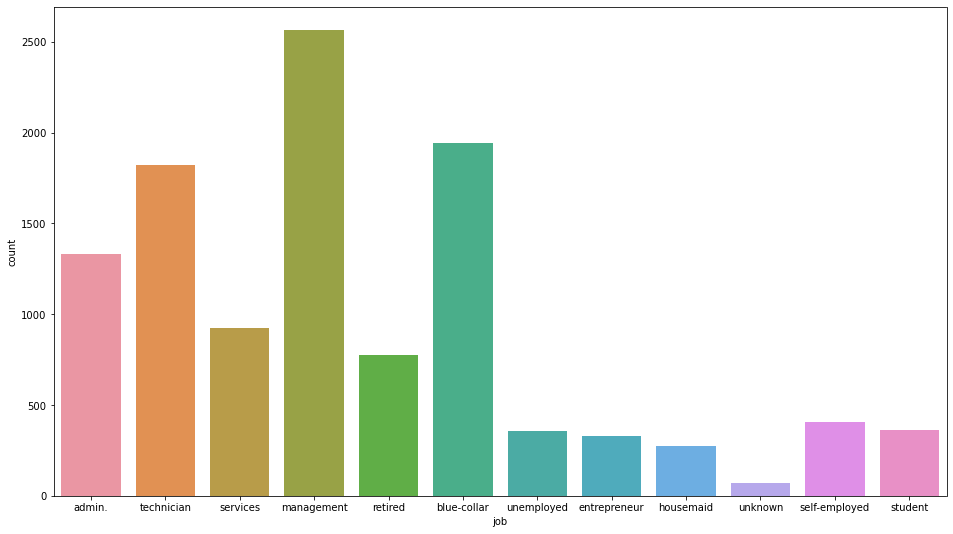

In [14]:
plt.figure(figsize = (16,9))
sns.countplot(x = "job",data = df)

<AxesSubplot:xlabel='marital', ylabel='count'>

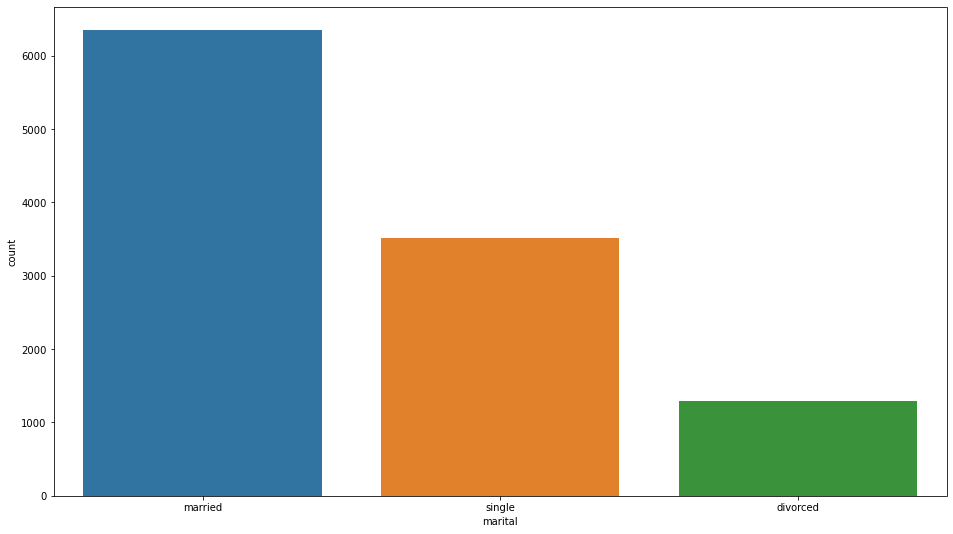

In [15]:
plt.figure(figsize = (16,9))
sns.countplot(x = "marital",data = df)

<AxesSubplot:xlabel='education', ylabel='count'>

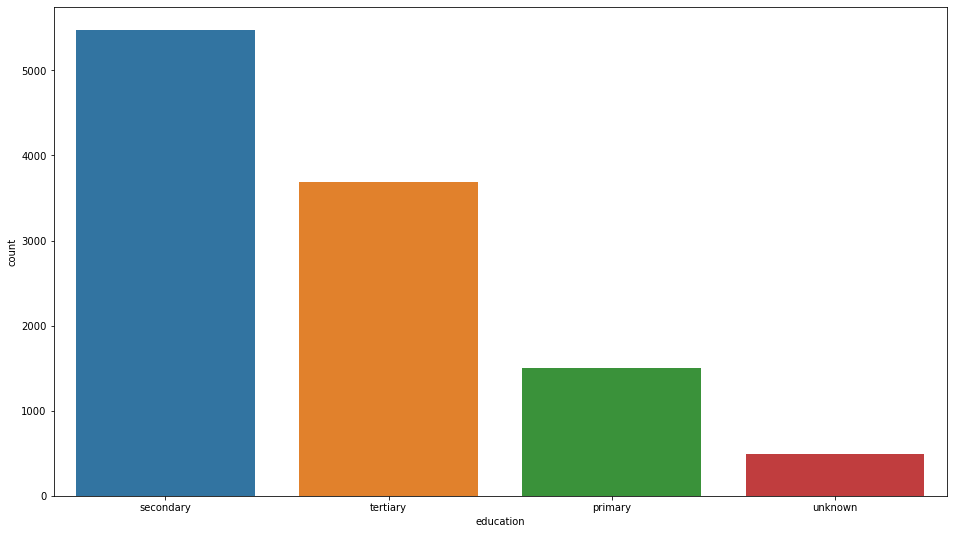

In [16]:
plt.figure(figsize = (16,9))
sns.countplot(x = "education",data = df)

<AxesSubplot:xlabel='deposit', ylabel='count'>

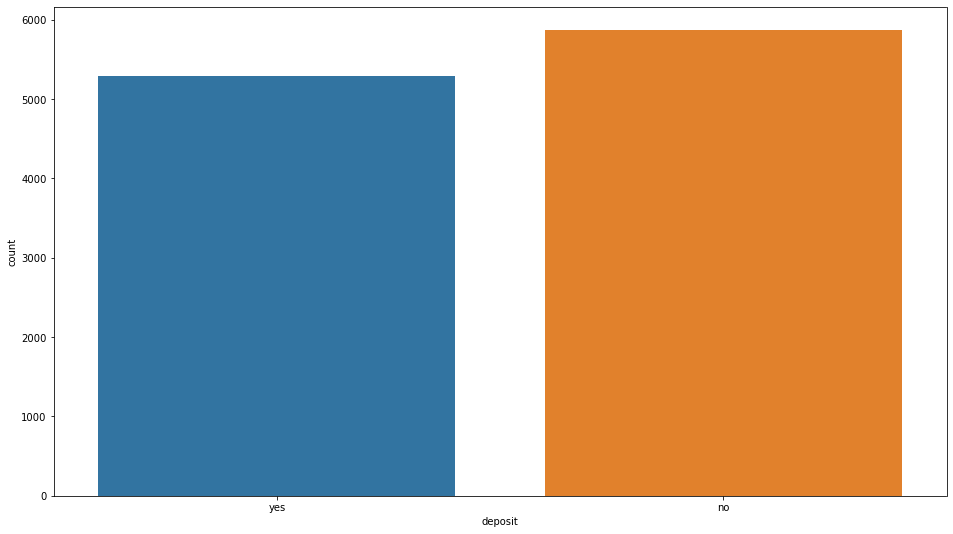

In [17]:
plt.figure(figsize = (16,9))
sns.countplot(x = "deposit",data = df)

<AxesSubplot:xlabel='default', ylabel='count'>

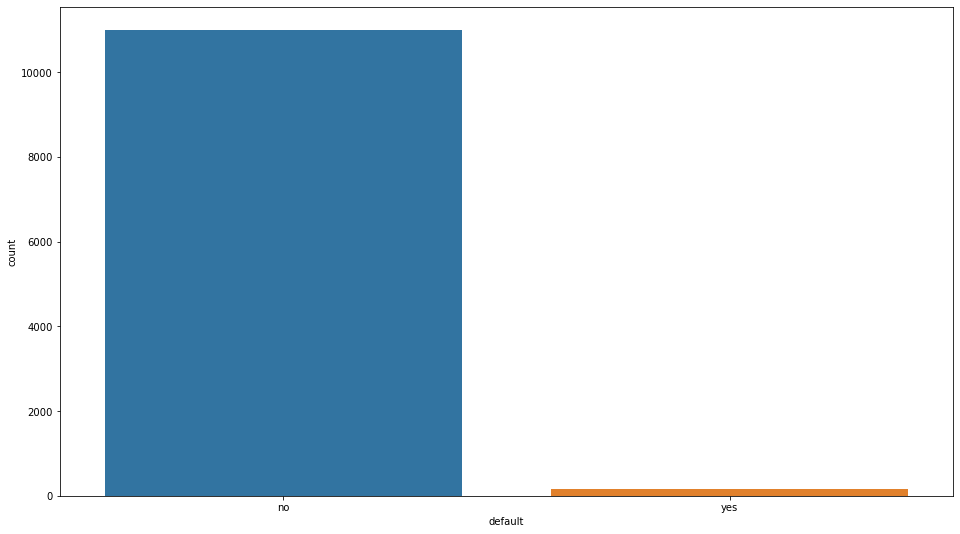

In [18]:
plt.figure(figsize = (16,9))
sns.countplot(x = "default",data = df)

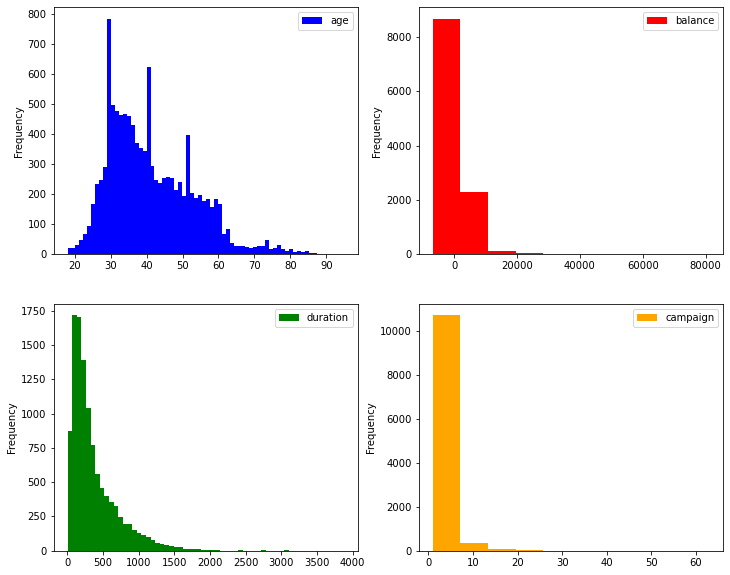

In [19]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,10))
df.plot(kind = "hist",y = "age",bins = 70,color = "blue",ax = axes[0][0])
df.plot(kind = "hist",y = "balance",bins = 10,color = "red",ax = axes[0][1])
df.plot(kind = "hist",y = "duration",bins = 60,color = "green",ax = axes[1][0])
df.plot(kind = "hist",y = "campaign",bins = 10,color = "orange",ax = axes[1][1])
plt.show()

<Figure size 1152x648 with 0 Axes>

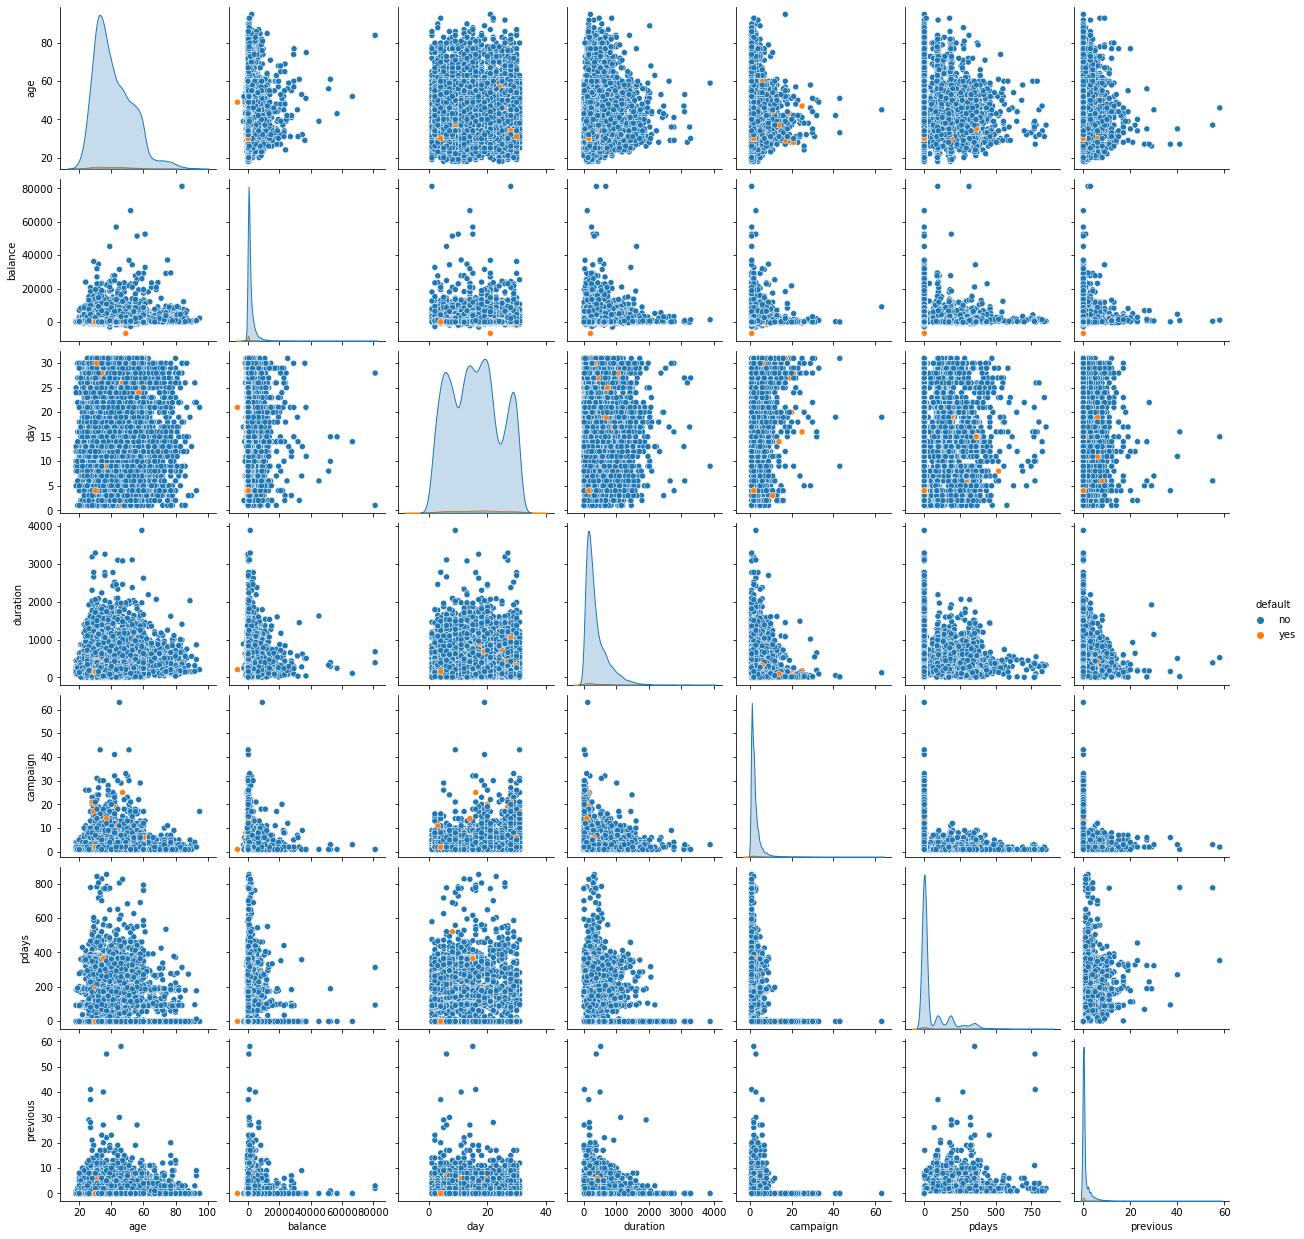

In [20]:
plt.figure(figsize = (16,9))
sns.pairplot(data = df,hue = "default")

## Check the Correlation of dataset

In [21]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


## Plot the heatmap

<AxesSubplot:>

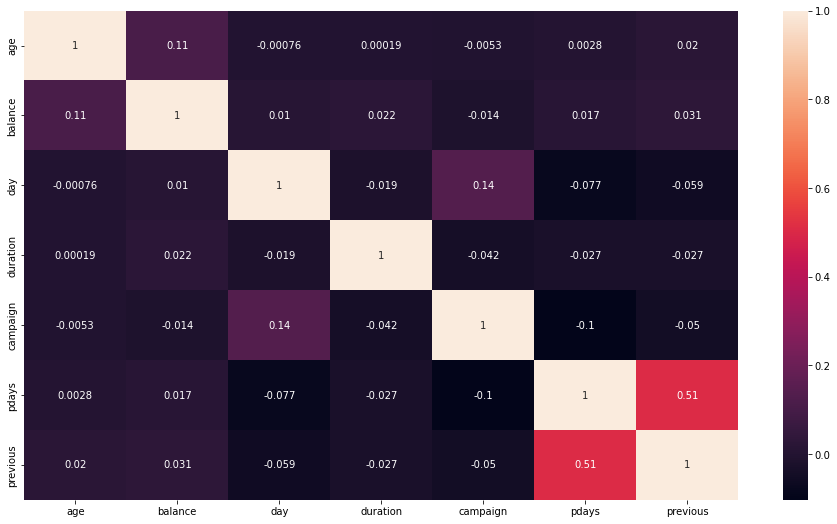

In [22]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(),annot = True)

## Convert data from categorical to numerical using Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le

LabelEncoder()

In [25]:
df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["deposit"] = le.fit_transform(df["deposit"])
df["default"] = le.fit_transform(df["default"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["poutcome"] = le.fit_transform(df["poutcome"])
df["housing"] = le.fit_transform(df["housing"])
df["month"] = le.fit_transform(df["month"])

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [27]:
df.drop(["pdays","previous","poutcome"],axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


## Split the data into train and test

In [28]:
x = df.drop(["default"],axis = 1)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,172,5,0,0


In [29]:
y = df["default"]
y

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: default, Length: 11162, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [32]:
x_train.shape

(7813, 16)

In [33]:
x_test.shape

(3349, 16)

In [34]:
y_train.shape

(7813,)

In [35]:
y_test.shape

(3349,)

## Build Decision Tree Classifier model

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dc = DecisionTreeClassifier()
dc

DecisionTreeClassifier()

In [38]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

## Predict the model

In [39]:
y_pred = dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Evaluate the model

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Accuracy

In [41]:
acc = accuracy_score(y_pred,y_test)*100

In [42]:
print("Accuracy Score: ", acc)

Accuracy Score:  96.59599880561362


### Confusion Matrix

In [43]:
cm = confusion_matrix(y_pred,y_test)

In [44]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3231   54]
 [  60    4]]


### Classification Report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3291
           1       0.06      0.07      0.07        58

    accuracy                           0.97      3349
   macro avg       0.52      0.53      0.52      3349
weighted avg       0.97      0.97      0.97      3349

